In [1]:
import pandas as pd
import os
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers.merge import concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, LSTM
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
def load_data(dataset_path='./npy_files'):
    X = np.load(os.path.join(dataset_path,'X.npy'))
    y = np.load(os.path.join(dataset_path,'y.npy'))
    folds = np.load(os.path.join(dataset_path,'folds.npy'))
    feature_class = np.load(os.path.join(dataset_path, 'feature_class.npy'))
    facs = pd.read_csv('save_data/npy_files/facs_multi.csv',index_col=None)

    # rescale [0,255] -> [0,2]    
    X = X.astype('float32')/255*2


    return X, y, folds, feature_class, facs

In [3]:
X, y, folds, feature_class, facs = load_data('./save_data/npy_files/')
del facs['Unnamed: 0']
del facs['10']
del facs['26']
del facs['0']

In [6]:
y_cat = keras.utils.to_categorical(y, 8)

In [8]:
y_cat = pd.DataFrame(y_cat)

In [15]:
y_cat.astype(int).apply(sum)

0    329
1    135
2     54
3    177
4     75
5    207
6     81
7    249
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
feature_class_single = np.zeros((1307, 4040))
for index, inst in enumerate(feature_class):
    feature_class_single[index] = inst[0]

In [7]:
feature_train, feature_test, facs_train, facs_test = \
        train_test_split(feature_class_single, facs, test_size=0.2)

In [8]:
feature_class_single

array([[0.00011116, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
facs

,1,2,4,5,6,7,9,12,15,17,20,23,24,25,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [16]:
facs.apply(sum)

1     390.0
2     294.0
4     363.0
5     276.0
6     285.0
7     237.0
9     183.0
12    240.0
15     96.0
17    339.0
20     81.0
23    129.0
24    129.0
25    543.0
27    216.0
dtype: float64

In [11]:
emotion_au = np.zeros((7,15))
for index, facs_value in facs.iterrows():
    if y[index] == 0:
        continue
    
    emotion_au[y[index]-1] += facs_value.astype(int)

In [71]:
emotion_au_df = pd.DataFrame(emotion_au, columns=facs.columns)
emotion_au_df = emotion_au_df.astype(int)

In [23]:
emotion_au_df_str = emotion_au_df
emotion_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sadness',
                          'Surprise', 'Contempt']
emotion_au_df_str.index = emotion_list

In [77]:
emotion_au_df

,1,2,4,5,6,7,9,12,15,17,20,23,24,25,27
0,0,0,120,18,24,96,9,3,9,117,0,108,99,0,0
1,3,3,3,0,0,0,0,15,12,15,0,3,6,0,0
2,3,0,108,0,54,99,174,6,6,120,0,6,21,27,0
3,66,30,63,48,9,18,0,6,0,9,75,0,0,69,0
4,0,0,0,0,198,21,0,201,0,0,3,0,0,201,0
5,75,18,66,0,0,3,0,0,66,78,0,9,3,0,0
6,243,243,3,210,0,0,0,9,3,0,3,3,0,246,216


In [58]:
au_num_by_emotion = np.zeros((7),int)
for i in range(7):
    au_num_by_emotion[i] = sum(emotion_au_df.iloc[i].values)

In [74]:
au_num_by_emotion

array([ 603,   60,  624,  393,  624,  318, 1179])

In [91]:
emotion_au_percent = emotion_au_df
for i in range(7):
    emotion_au_percent.iloc[i] /= au_num_by_emotion[i]

In [92]:
emotion_au_percent_str = emotion_au_percent.applymap(lambda x: str(round(x*100,1))+'%')

In [93]:
emotion_au_percent

,1,2,4,5,6,7,9,12,15,17,20,23,24,25,27
0,0.000000,0.000000,0.199005,0.029851,0.039801,0.159204,0.014925,0.004975,0.014925,0.194030,0.000000,0.179104,0.164179,0.000000,0.000000
1,0.050000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.250000,0.200000,0.250000,0.000000,0.050000,0.100000,0.000000,0.000000
2,0.004808,0.000000,0.173077,0.000000,0.086538,0.158654,0.278846,0.009615,0.009615,0.192308,0.000000,0.009615,0.033654,0.043269,0.000000
3,0.167939,0.076336,0.160305,0.122137,0.022901,0.045802,0.000000,0.015267,0.000000,0.022901,0.190840,0.000000,0.000000,0.175573,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.317308,0.033654,0.000000,0.322115,0.000000,0.000000,0.004808,0.000000,0.000000,0.322115,0.000000
5,0.235849,0.056604,0.207547,0.000000,0.000000,0.009434,0.000000,0.000000,0.207547,0.245283,0.000000,0.028302,0.009434,0.000000,0.000000
6,0.206107,0.206107,0.002545,0.178117,0.000000,0.000000,0.000000,0.007634,0.002545,0.000000,0.002545,0.002545,0.000000,0.208651,0.183206


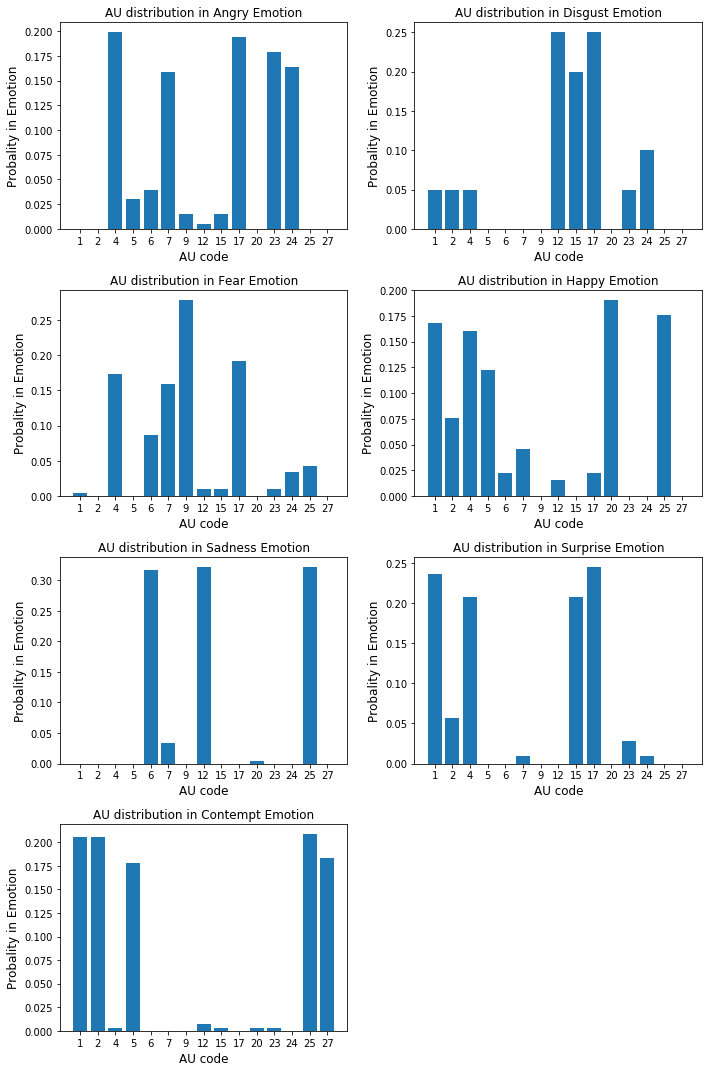

In [135]:
plt.figure(figsize=(10,15))
for i in range(emotion_au_percent.shape[0]):
    plt.subplot(4,2,i+1)
    plt.title('AU distribution in '+ emotion_list[i]+' Emotion')
    plt.bar(emotion_au_percent.columns, emotion_au_percent.iloc[i])

    plt.xlabel('AU code', fontsize=12)
    plt.ylabel('Probality in Emotion', fontsize=12)
    plt.tight_layout()
plt.savefig('au_distribution.png')

In [84]:
au_emotion_percent.values[i][j]

0.0

In [81]:
emotion_au_df.values[i][j].astype(str)

'0'

In [89]:
emotion_au_table = []
for i in range(emotion_au_df.shape[0]):
    tmp_row = []
    for j in range(emotion_au_df.shape[1]):
        tmp_row.append(emotion_au_df.values[i][j].astype(str)+'/'+ emotion_au_percent.values[i][j])
    emotion_au_table.append(tmp_row)
emotion_au_table = np.array(emotion_au_table)
emotion_au_table = pd.DataFrame(emotion_au_table, columns=au_str_list, index=emotion_list)

In [90]:
emotion_au_table

,AU 1,AU 2,AU 4,AU 5,AU 6,AU 7,AU 9,AU 12,AU 15,AU 17,AU 20,AU 23,AU 24,AU 25,AU 27
Angry,0/0.0%,0/0.0%,120/19.9%,18/3.0%,24/4.0%,96/15.9%,9/1.5%,3/0.5%,9/1.5%,117/19.4%,0/0.0%,108/17.9%,99/16.4%,0/0.0%,0/0.0%
Disgust,3/5.0%,3/5.0%,3/5.0%,0/0.0%,0/0.0%,0/0.0%,0/0.0%,15/25.0%,12/20.0%,15/25.0%,0/0.0%,3/5.0%,6/10.0%,0/0.0%,0/0.0%
Fear,3/0.5%,0/0.0%,108/17.3%,0/0.0%,54/8.7%,99/15.9%,174/27.9%,6/1.0%,6/1.0%,120/19.2%,0/0.0%,6/1.0%,21/3.4%,27/4.3%,0/0.0%
Happy,66/16.8%,30/7.6%,63/16.0%,48/12.2%,9/2.3%,18/4.6%,0/0.0%,6/1.5%,0/0.0%,9/2.3%,75/19.1%,0/0.0%,0/0.0%,69/17.6%,0/0.0%
Sadness,0/0.0%,0/0.0%,0/0.0%,0/0.0%,198/31.7%,21/3.4%,0/0.0%,201/32.2%,0/0.0%,0/0.0%,3/0.5%,0/0.0%,0/0.0%,201/32.2%,0/0.0%
Surprise,75/23.6%,18/5.7%,66/20.8%,0/0.0%,0/0.0%,3/0.9%,0/0.0%,0/0.0%,66/20.8%,78/24.5%,0/0.0%,9/2.8%,3/0.9%,0/0.0%,0/0.0%
Contempt,243/20.6%,243/20.6%,3/0.3%,210/17.8%,0/0.0%,0/0.0%,0/0.0%,9/0.8%,3/0.3%,0/0.0%,3/0.3%,3/0.3%,0/0.0%,246/20.9%,216/18.3%


In [42]:
au_emotion_table_df = pd.DataFrame(au_emotion_table, columns=emotion_list ,index=au_str_list)

In [43]:
au_emotion_table_df

,Angry,Disgust,Fear,Happy,Sadness,Surprise,Contempt
AU 1,0/0.0%,3/6.0%,3/2.0%,66/88.0%,0/0.0%,75/93.0%,243/42.0%
AU 2,0/0.0%,3/6.0%,0/0.0%,30/40.0%,0/0.0%,18/22.0%,243/42.0%
AU 4,120/89.0%,3/6.0%,108/61.0%,63/84.0%,0/0.0%,66/81.0%,3/1.0%
AU 5,18/13.0%,0/0.0%,0/0.0%,48/64.0%,0/0.0%,0/0.0%,210/36.0%
AU 6,24/18.0%,0/0.0%,54/31.0%,9/12.0%,198/96.0%,0/0.0%,0/0.0%
AU 7,96/71.0%,0/0.0%,99/56.0%,18/24.0%,21/10.0%,3/4.0%,0/0.0%
AU 9,9/7.0%,0/0.0%,174/98.0%,0/0.0%,0/0.0%,0/0.0%,0/0.0%
AU 12,3/2.0%,15/28.0%,6/3.0%,6/8.0%,201/97.0%,0/0.0%,9/2.0%
AU 15,9/7.0%,12/22.0%,6/3.0%,0/0.0%,0/0.0%,66/81.0%,3/1.0%
AU 17,117/87.0%,15/28.0%,120/68.0%,9/12.0%,0/0.0%,78/96.0%,0/0.0%
